# AirBnb

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Airbnb_Open_Data.csv")
df

/var/folders/09/89vgqkmd3mq14q_6bkk_t7vm0000gn/T/ipykernel_73989/207706106.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

Drop unnecesary columns

In [4]:
df = df.drop(columns=['license', 'id', 'host name', 'NAME', 'house_rules'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host id                         102599 non-null  int64  
 1   host_identity_verified          102310 non-null  object 
 2   neighbourhood group             102570 non-null  object 
 3   neighbourhood                   102583 non-null  object 
 4   lat                             102591 non-null  float64
 5   long                            102591 non-null  float64
 6   country                         102067 non-null  object 
 7   country code                    102468 non-null  object 
 8   instant_bookable                102494 non-null  object 
 9   cancellation_policy             102523 non-null  object 
 10  room type                       102599 non-null  object 
 11  Construction year               102385 non-null  float64
 12  price           

In [6]:
df.describe()

,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,102591.000000,102591.000000,102385.000000,102190.000000,102416.000000,86720.000000,102273.000000,102280.000000,102151.000000
mean,4.925411e+10,40.728094,-73.949644,2012.487464,8.135845,27.483743,1.374022,3.279106,7.936605,141.133254
std,2.853900e+10,0.055857,0.049521,5.765556,30.553781,49.508954,1.746621,1.284657,32.218780,135.435024
min,1.236005e+08,40.499790,-74.249840,2003.000000,-1223.000000,0.000000,0.010000,1.000000,1.000000,-10.000000
25%,2.458333e+10,40.688740,-73.982580,2007.000000,2.000000,1.000000,0.220000,2.000000,1.000000,3.000000
50%,4.911774e+10,40.722290,-73.954440,2012.000000,3.000000,7.000000,0.740000,3.000000,1.000000,96.000000
75%,7.399650e+10,40.762760,-73.932350,2017.000000,5.000000,30.000000,2.000000,4.000000,2.000000,269.000000
max,9.876313e+10,40.916970,-73.705220,2022.000000,5645.000000,1024.000000,90.000000,5.000000,332.000000,3677.000000


In [7]:
df.columns

Index(['host id', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

In [8]:
df.shape

(102599, 21)

In [9]:
df.nunique(axis=0)

host id                           102057
host_identity_verified                 2
neighbourhood group                    7
neighbourhood                        224
lat                                21991
long                               17774
country                                1
country code                           1
instant_bookable                       2
cancellation_policy                    3
room type                              4
Construction year                     20
price                               1151
service fee                          231
minimum nights                       153
number of reviews                    476
last review                         2477
reviews per month                   1016
review rate number                     5
calculated host listings count        78
availability 365                     438
dtype: int64

# Cleaning data

In [10]:
round(df.isna().sum().sort_values(ascending=False)/len(df)*100,3)

last review                       15.490
reviews per month                 15.477
country                            0.519
availability 365                   0.437
minimum nights                     0.399
review rate number                 0.318
calculated host listings count     0.311
host_identity_verified             0.282
service fee                        0.266
price                              0.241
Construction year                  0.209
number of reviews                  0.178
country code                       0.128
instant_bookable                   0.102
cancellation_policy                0.074
neighbourhood group                0.028
neighbourhood                      0.016
long                               0.008
lat                                0.008
host id                            0.000
room type                          0.000
dtype: float64

In [13]:
df['last review']

0         10/19/2021
1          5/21/2022
2                NaN
3           7/5/2019
4         11/19/2018
             ...    
102594           NaN
102595      7/6/2015
102596           NaN
102597    10/11/2015
102598           NaN
Name: last review, Length: 102599, dtype: object

Since "Last review" are dates, and listings without a review will not have a review, we can remove this column and instead focus on reviews per month

In [15]:
df.drop(columns='last review', inplace=True)

In [16]:
df.columns

Index(['host id', 'host_identity_verified', 'neighbourhood group',
       'neighbourhood', 'lat', 'long', 'country', 'country code',
       'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'reviews per month', 'review rate number',
       'calculated host listings count', 'availability 365'],
      dtype='object')

### Last review notes

In [11]:
reviews = pd.DataFrame(df["last review"])

In [12]:
reviews["number_of_reviews"] = df["number of reviews"]

In [13]:
reviews[reviews["number_of_reviews"] == 0]

,last review,number_of_reviews
2,NaN,0.0
20,NaN,0.0
27,NaN,0.0
37,NaN,0.0
39,NaN,0.0
...,...,...
102590,NaN,0.0
102592,NaN,0.0
102594,NaN,0.0
102596,NaN,0.0


In [14]:
reviews

,last review,number_of_reviews
0,10/19/2021,9.0
1,5/21/2022,45.0
2,NaN,0.0
3,7/5/2019,270.0
4,11/19/2018,9.0
...,...,...
102594,NaN,0.0
102595,7/6/2015,1.0
102596,NaN,0.0
102597,10/11/2015,5.0


###  Column: Country

In [15]:
df.shape

(102599, 21)

In [16]:
df.country.unique()

array(['United States', nan], dtype=object)

In [17]:
df.country.isnull().sum()

532

In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")

df[["country"]] = imputer.fit_transform(df[["country"]])

df

,host id,host_identity_verified,neighbourhood group,neighbourhood,lat,long,country,country code,instant_bookable,cancellation_policy,...,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,80014485718,unconfirmed,Brooklyn,Kensington,40.64749,-73.97237,United States,US,False,strict,...,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,52335172823,verified,Manhattan,Midtown,40.75362,-73.98377,United States,US,False,moderate,...,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,78829239556,NaN,Manhattan,Harlem,40.80902,-73.94190,United States,US,True,flexible,...,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,85098326012,unconfirmed,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,US,True,moderate,...,2005.0,$368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,92037596077,verified,Manhattan,East Harlem,40.79851,-73.94399,United States,US,False,moderate,...,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,12312296767,verified,Brooklyn,Williamsburg,40.70862,-73.94651,United States,US,False,flexible,...,2003.0,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0
102595,77864383453,unconfirmed,Manhattan,Morningside Heights,40.80460,-73.96545,United States,US,True,moderate,...,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0
102596,69050334417,unconfirmed,Brooklyn,Park Slope,40.67505,-73.98045,United States,US,True,moderate,...,2009.0,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0
102597,11160591270,unconfirmed,Queens,Long Island City,40.74989,-73.93777,United States,US,True,strict,...,2015.0,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0


### Pending missing values

In [19]:
round(df.isna().sum().sort_values(ascending=False)/len(df)*100,2)

last review                       15.49
reviews per month                 15.48
availability 365                   0.44
minimum nights                     0.40
review rate number                 0.32
calculated host listings count     0.31
host_identity_verified             0.28
service fee                        0.27
price                              0.24
Construction year                  0.21
number of reviews                  0.18
country code                       0.13
instant_bookable                   0.10
cancellation_policy                0.07
neighbourhood group                0.03
neighbourhood                      0.02
lat                                0.01
long                               0.01
host id                            0.00
country                            0.00
room type                          0.00
dtype: float64

In [20]:
df.isnull().sum().sort_values(ascending=False)

last review                       15893
reviews per month                 15879
availability 365                    448
minimum nights                      409
review rate number                  326
calculated host listings count      319
host_identity_verified              289
service fee                         273
price                               247
Construction year                   214
number of reviews                   183
country code                        131
instant_bookable                    105
cancellation_policy                  76
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
host id                               0
country                               0
room type                             0
dtype: int64

In [21]:
df["neighbourhood"].nunique()

224

In [22]:
df = df.drop(columns=['neighbourhood'])

In [23]:
df = df.drop(columns=['country code'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host id                         102599 non-null  int64  
 1   host_identity_verified          102310 non-null  object 
 2   neighbourhood group             102570 non-null  object 
 3   lat                             102591 non-null  float64
 4   long                            102591 non-null  float64
 5   country                         102599 non-null  object 
 6   instant_bookable                102494 non-null  object 
 7   cancellation_policy             102523 non-null  object 
 8   room type                       102599 non-null  object 
 9   Construction year               102385 non-null  float64
 10  price                           102352 non-null  object 
 11  service fee                     102326 non-null  object 
 12  minimum nights  

### Neighbourhood group: Visualizations

<AxesSubplot:xlabel='neighbourhood group', ylabel='Count'>

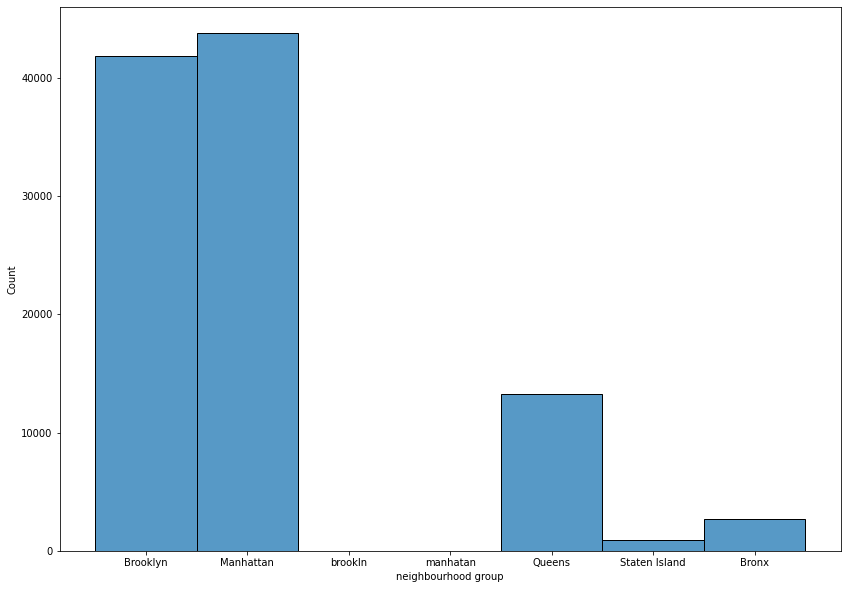

In [25]:
plt.figure(figsize=(14,10))
sns.histplot(data = df, x="neighbourhood group")

In [26]:
df['neighbourhood group'].value_counts()

Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: neighbourhood group, dtype: int64

In [27]:
df['neighbourhood group'] = df['neighbourhood group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'})

In [28]:
df['neighbourhood group'].value_counts()

Manhattan        43793
Brooklyn         41843
Queens           13267
Bronx             2712
Staten Island      955
Name: neighbourhood group, dtype: int64

<AxesSubplot:title={'center':'Neighbourhood Group'}, xlabel='neighbourhood group', ylabel='Count'>

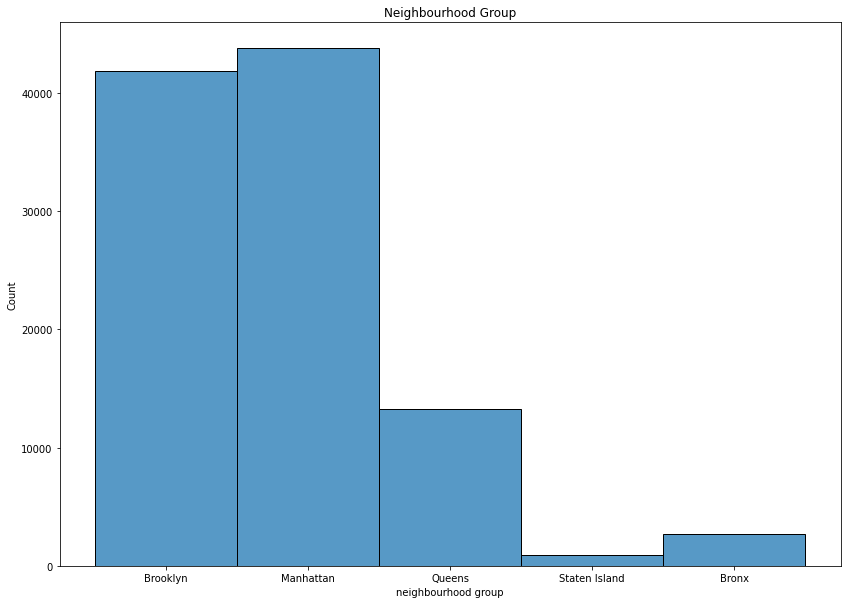

In [29]:
plt.figure(figsize=(14,10))
plt.title("Neighbourhood Group")
sns.histplot(data = df, x="neighbourhood group")

## Change numerical columns to float

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host id                         102599 non-null  int64  
 1   host_identity_verified          102310 non-null  object 
 2   neighbourhood group             102570 non-null  object 
 3   lat                             102591 non-null  float64
 4   long                            102591 non-null  float64
 5   country                         102599 non-null  object 
 6   instant_bookable                102494 non-null  object 
 7   cancellation_policy             102523 non-null  object 
 8   room type                       102599 non-null  object 
 9   Construction year               102385 non-null  float64
 10  price                           102352 non-null  object 
 11  service fee                     102326 non-null  object 
 12  minimum nights  

**Change price and service fee from object to float**

In [31]:
df['price'] = df['price'].str.replace("$","")
df['price'] = df['price'].str.replace(',',"")
df['price'] = df['price'].astype(float)
df['price']

/var/folders/09/89vgqkmd3mq14q_6bkk_t7vm0000gn/T/ipykernel_67174/1281994989.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = df['price'].str.replace("$","")


0          966.0
1          142.0
2          620.0
3          368.0
4          204.0
           ...  
102594     844.0
102595     837.0
102596     988.0
102597     546.0
102598    1032.0
Name: price, Length: 102599, dtype: float64

In [32]:
df['service fee'] = df['service fee'].str.replace("$","")
df['service fee'] = df['service fee'].astype(float)
df['service fee']

/var/folders/09/89vgqkmd3mq14q_6bkk_t7vm0000gn/T/ipykernel_67174/698127665.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['service fee'] = df['service fee'].str.replace("$","")


0         193.0
1          28.0
2         124.0
3          74.0
4          41.0
          ...  
102594    169.0
102595    167.0
102596    198.0
102597    109.0
102598    206.0
Name: service fee, Length: 102599, dtype: float64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host id                         102599 non-null  int64  
 1   host_identity_verified          102310 non-null  object 
 2   neighbourhood group             102570 non-null  object 
 3   lat                             102591 non-null  float64
 4   long                            102591 non-null  float64
 5   country                         102599 non-null  object 
 6   instant_bookable                102494 non-null  object 
 7   cancellation_policy             102523 non-null  object 
 8   room type                       102599 non-null  object 
 9   Construction year               102385 non-null  float64
 10  price                           102352 non-null  float64
 11  service fee                     102326 non-null  float64
 12  minimum nights  

<AxesSubplot:xlabel='price', ylabel='Count'>

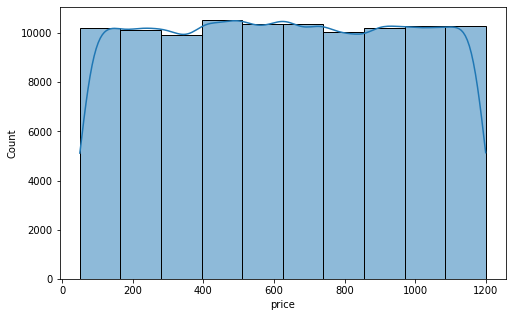

In [34]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="price", kde=True, bins=10)

<AxesSubplot:xlabel='service fee', ylabel='Count'>

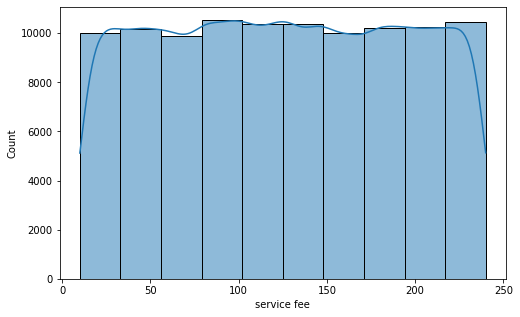

In [35]:
plt.figure(figsize=(8,5))

sns.histplot(data=df, x='service fee', kde=True, bins=10)

### Price per neighbourhood group

<AxesSubplot:xlabel='price', ylabel='Count'>

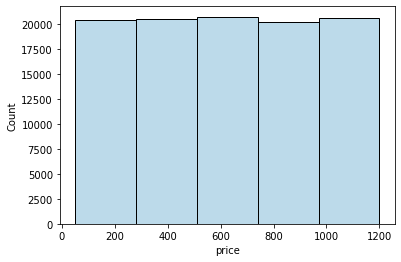

In [50]:
sns.histplot(df['price'], bins=5)

### Room Type

/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room type', ylabel='count'>

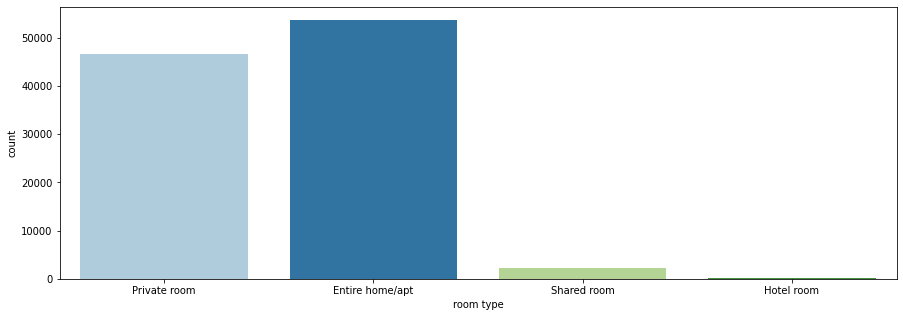

In [36]:
plt.figure(figsize=(15,5))
sns.set_palette("Paired")
sns.countplot(df['room type'])

/Users/marielyngholm/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood group', ylabel='count'>

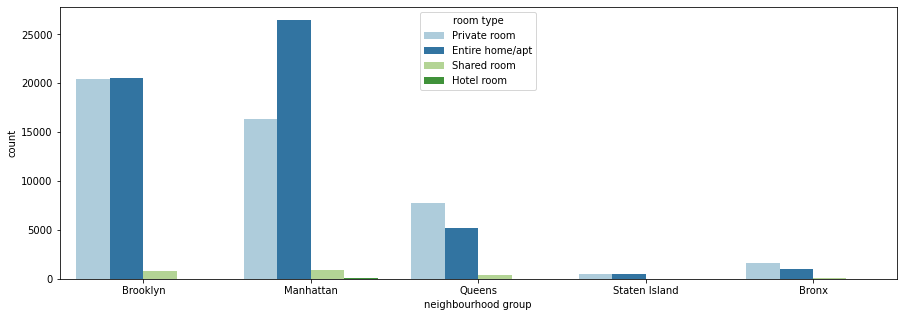

In [37]:
plt.figure(figsize=(15,5))
sns.countplot(df['neighbourhood group'], hue=df['room type'])